## Macroeconomics and Real Estate: 1929 and Today

### [Tim Savage](https://www.sps.nyu.edu/homepage/academics/faculty-directory/20319-timothy-h-savage.html) | NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance

#### Faculty Coordinator | Data Analytics

#### Distinguished Fellow | NAIOP Research Foundation

#### Mentor | RERI

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## 1929 and the Great Depression

* Policy-makers had little to **little or no data**
* **Cowles Commission** and **National Income and Product Accounts**
    * Large-scale macroeconometric models for policy-making that failed in an era of stagflation
    * Microeconomic approaches begin to prevail
        * Natural experiments
        * Randomized control trials
        * Algorithmic counterfactuals
* Federal Reserve now relies on **real-time data** to gauge economic activity

## CRE Was Faced with Tech Disruption Before COVID-19

* Aggolomeration economics driving global urbanization and density
* Amazon and e-commerce driving distributional efficiency of goods
* WeWork and co-working driving optionality in space markets

## COVID-19 Will Accelerate These Disruptions (Probabilistically)


* Capital allocation in CRE is akin to bond trading prior to BSM
* Algorithms will be deployed
* We have 160 observations to help you allocate billions!

## The Current U.S. Economic Cycle
### Some Relevant Empirical Regularities

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

Text(0, 0.5, '%')

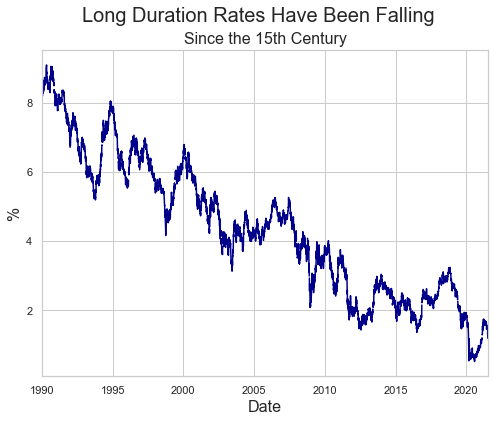

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 15th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



Text(0, 0.5, '%')

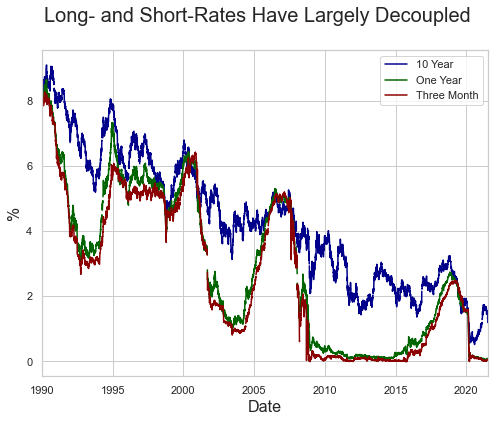

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

In [5]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

Text(0, 0.5, '%')

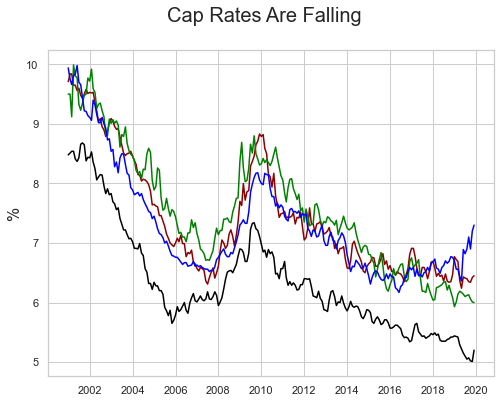

In [6]:
plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.ylabel('%', fontsize=16)

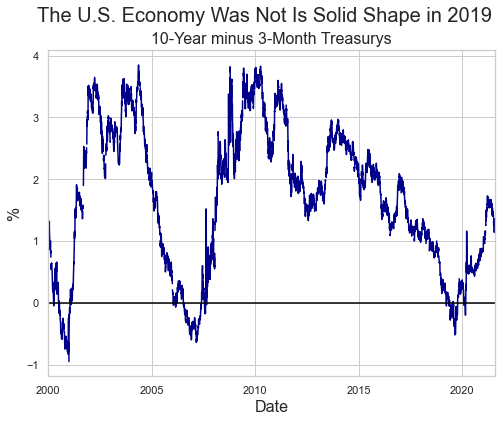

In [7]:
yield_curve = fred.get_series("T10Y3M", observation_start='2000-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The U.S. Economy Was Not Is Solid Shape in 2019', fontsize=20)
plt.title('10-Year minus 3-Month Treasurys', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

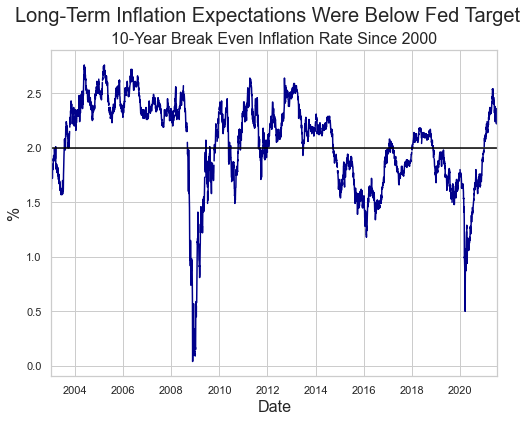

In [8]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long-Term Inflation Expectations Were Below Fed Target', fontsize=20)
plt.title('10-Year Break Even Inflation Rate Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

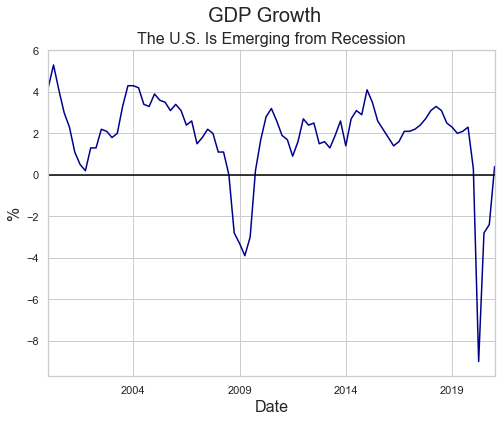

In [9]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('GDP Growth', fontsize=20)
plt.title('The U.S. Is Emerging from Recession', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

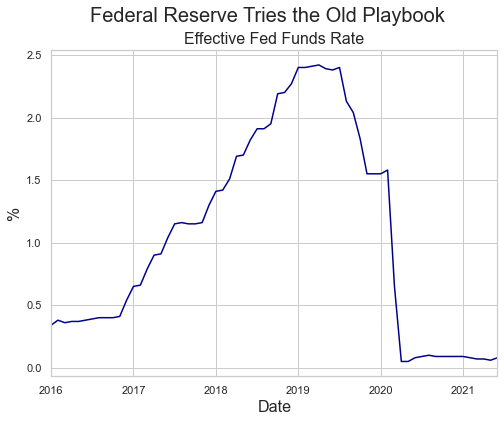

In [10]:
fed_funds = fred.get_series("FEDFUNDS", observation_start='2016-01-01')
fed_funds.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Tries the Old Playbook', fontsize=20)
plt.title('Effective Fed Funds Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

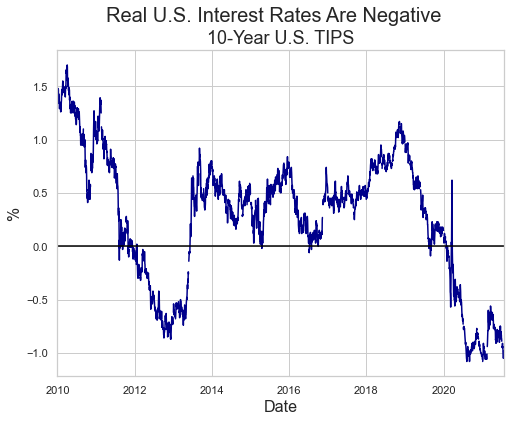

In [11]:
growth = fred.get_series("DFII10", observation_start='2010-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Real U.S. Interest Rates Are Negative', fontsize=20)
plt.title('10-Year U.S. TIPS', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

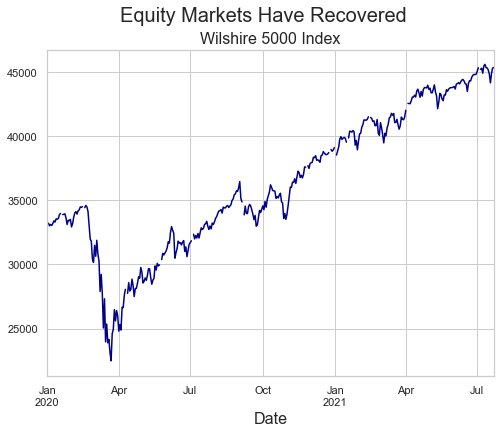

In [12]:
wilshire = fred.get_series("WILL5000PR", observation_start='2020-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Equity Markets Have Recovered', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '')

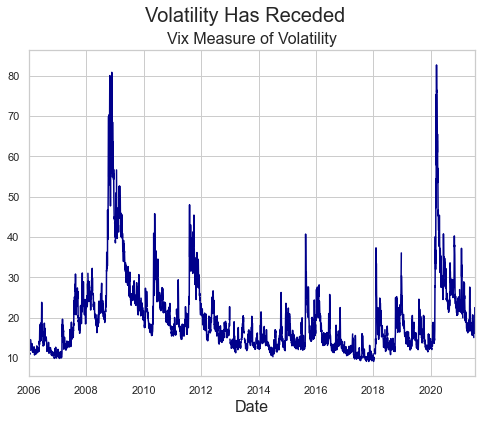

In [13]:
vix = fred.get_series("VIXCLS", observation_start='2006-01-01')
vix.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Volatility Has Receded', fontsize=20)
plt.title('Vix Measure of Volatility', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)


Text(0, 0.5, 'Millions ($)')

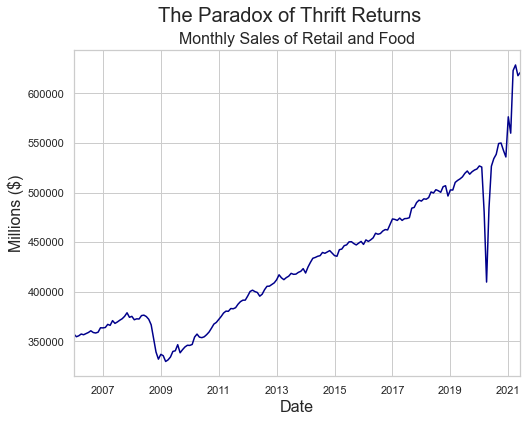

In [14]:
sales = fred.get_series("RSAFS", observation_start='2006-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Paradox of Thrift Returns', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)


Text(0, 0.5, 'Ratio')

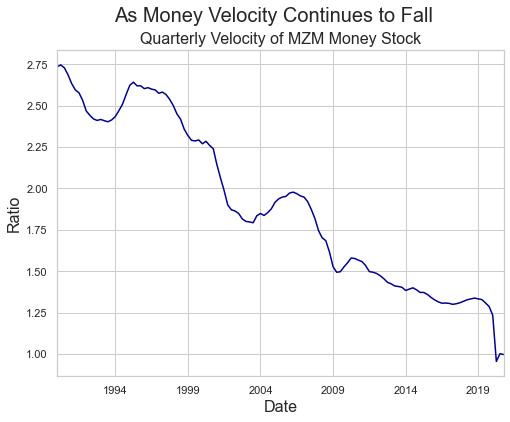

In [15]:
velocity = fred.get_series("MZMV", observation_start='1990-01-01')
velocity.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('As Money Velocity Continues to Fall', fontsize=20)
plt.title('Quarterly Velocity of MZM Money Stock', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ratio', fontsize=16)


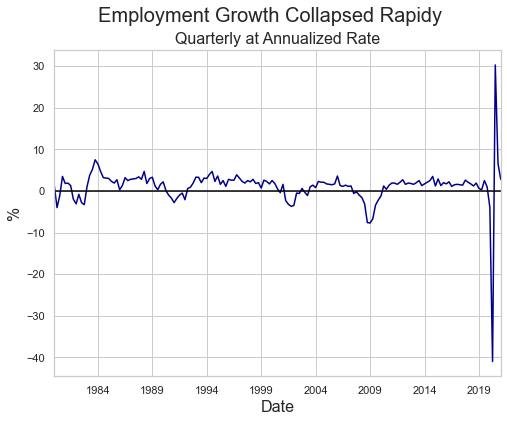

In [16]:
emp_growth = fred.get_series("PRS85006012", observation_start='1980-01-01')
emp_growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Employment Growth Collapsed Rapidy', fontsize=20)
plt.title('Quarterly at Annualized Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

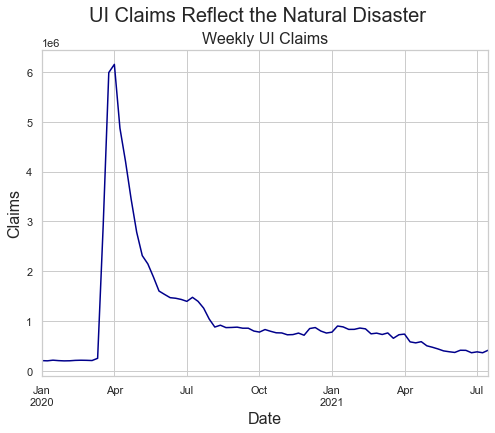

In [17]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('UI Claims Reflect the Natural Disaster', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

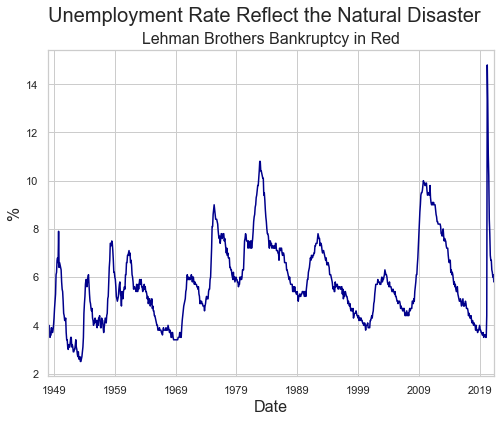

In [18]:
unemp_rate = fred.get_series("UNRATE", observation_start='1940-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unemployment Rate Reflect the Natural Disaster', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)


Text(0, 0.5, '%')

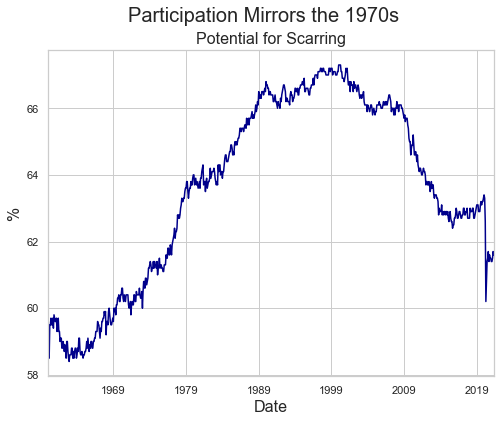

In [19]:
lfpr = fred.get_series("CIVPART", observation_start='1960-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Participation Mirrors the 1970s', fontsize=20)
plt.title('Potential for Scarring', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)


## Implications
#### Knight (1972)
#### Bagehot (1877)
#### Keynes (1946)

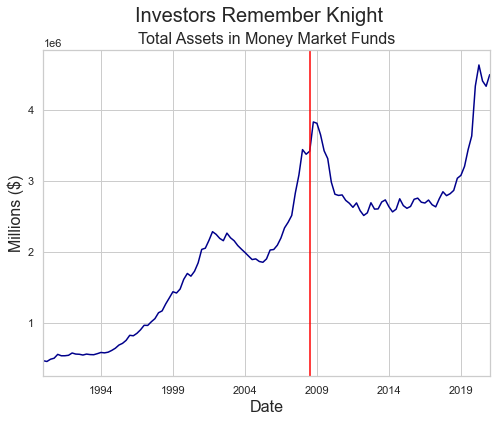

In [20]:
cash = fred.get_series("MMMFFAQ027S", observation_start='1990-01-01')
cash.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Investors Remember Knight', fontsize=20)
plt.title('Total Assets in Money Market Funds', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

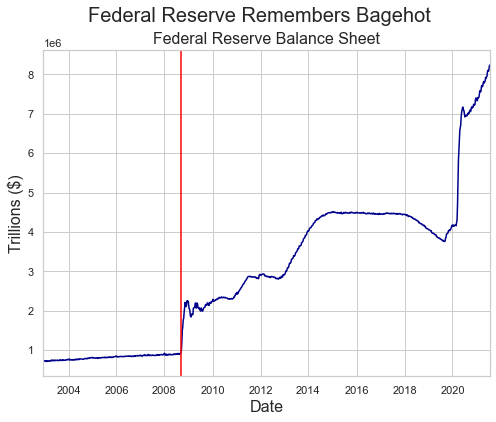

In [21]:
balance_sheet = fred.get_series("WALCL", observation_start='2000-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Remembers Bagehot', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

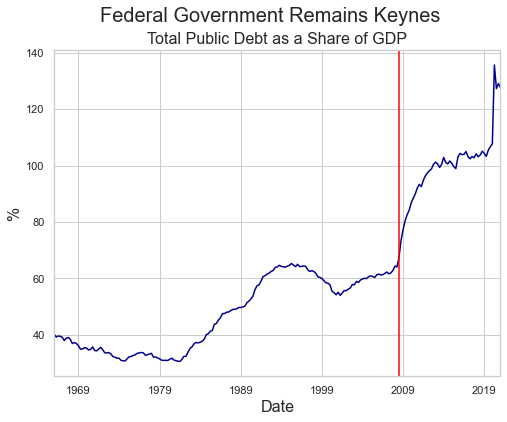

In [22]:
debt_as_share = fred.get_series("GFDEGDQ188S", observation_start='1950-01-01')
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Government Remains Keynes', fontsize=20)
plt.title('Total Public Debt as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

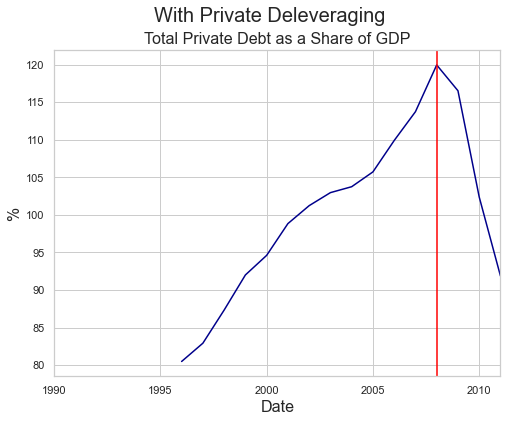

In [23]:
debt_as_share = fred.get_series("DDDM03USA156NWDB", observation_start='1950-01-01')
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('With Private Deleveraging', fontsize=20)
plt.title('Total Private Debt as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## 1929 and Today: 
## The Data Remain Essential

In [24]:
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (210000000 - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (210000000 - vaccination['people_fully_vaccinated']) / 210000000 * 100
vaccination['rate'] = vaccination['daily_vaccinations'] / vaccination['people_outstanding'] * 100

Text(0, 0.5, '%')

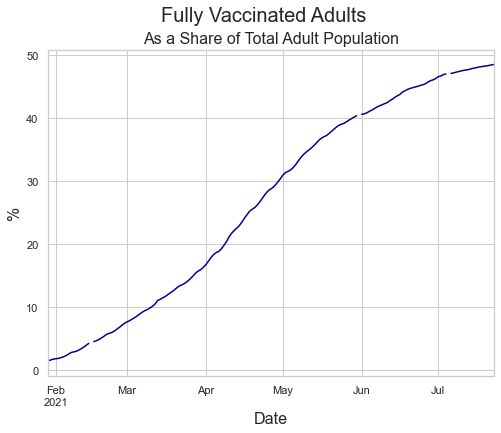

In [25]:
vaccination['people_fully_vaccinated_per_hundred'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fully Vaccinated Adults', fontsize=20)
plt.title('As a Share of Total Adult Population', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



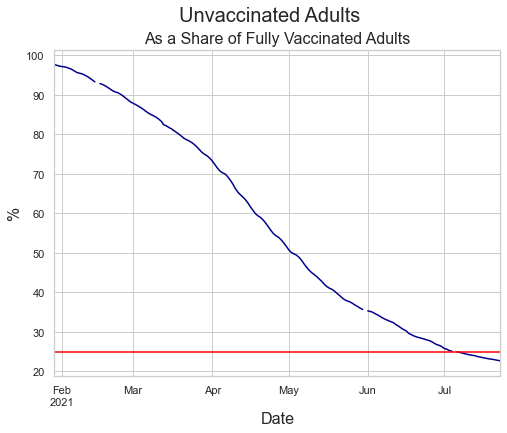

In [26]:
vaccination['outstanding'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unvaccinated Adults', fontsize=20)
plt.title('As a Share of Fully Vaccinated Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(25, color="red")


Text(0, 0.5, '%')

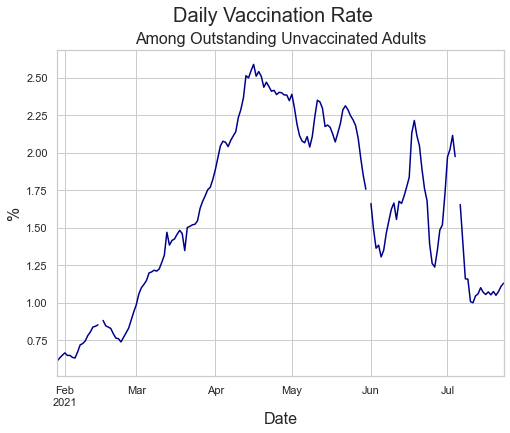

In [27]:
vaccination['rate'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Daily Vaccination Rate', fontsize=20)
plt.title('Among Outstanding Unvaccinated Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)


### Thank You

### Q&A

### Slides: https://github.com/thsavage/Public-Presentations